In [18]:
from google.colab import files
uploaded =files.upload()
for fn in uploaded.keys():
   print('User Uploaded"{name}" with lengt{length} bytes'.format(name=fn,length=len(uploaded[fn])))

# then move kaggle.json into the folder where the API expects to find it

Saving kaggle.json to kaggle.json
User Uploaded"kaggle.json" with lengt69 bytes


In [19]:
import os
import shutil

# Make a directory for Kaggle credentials if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the kaggle.json file to the correct directory
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions for the API key
os.chmod("/root/.kaggle/kaggle.json", 600)


In [20]:
!pip install kaggle


In [21]:
!kaggle datasets download -d vinayakshanawad/weedcrop-image-dataset


Dataset URL: https://www.kaggle.com/datasets/vinayakshanawad/weedcrop-image-dataset
License(s): CC0-1.0
weedcrop-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
import zipfile
dataset_zip="weedcrop-image-dataset.zip"
output_dir="weedcrop_images"
# Extract the dataset
with zipfile.ZipFile(dataset_zip,'r') as zip_ref:
  zip_ref.extractall(output_dir)
print(f"Dataset extracted to:{output_dir}")


Dataset extracted to:weedcrop_images


In [23]:
# Verify the dataset

In [24]:
print("Extracted files:")
for root,dirs,files in os.walk("weedcrop_images"):
    print(f"{root} contains {len(files)} files")

Extracted files:
weedcrop_images contains 0 files
weedcrop_images/WeedCrop.v1i.yolov5pytorch contains 1 files
weedcrop_images/WeedCrop.v1i.yolov5pytorch/test contains 0 files
weedcrop_images/WeedCrop.v1i.yolov5pytorch/test/labels contains 118 files
weedcrop_images/WeedCrop.v1i.yolov5pytorch/test/images contains 118 files
weedcrop_images/WeedCrop.v1i.yolov5pytorch/train contains 0 files
weedcrop_images/WeedCrop.v1i.yolov5pytorch/train/labels contains 2469 files
weedcrop_images/WeedCrop.v1i.yolov5pytorch/train/images contains 2469 files
weedcrop_images/WeedCrop.v1i.yolov5pytorch/valid contains 0 files
weedcrop_images/WeedCrop.v1i.yolov5pytorch/valid/labels contains 235 files
weedcrop_images/WeedCrop.v1i.yolov5pytorch/valid/images contains 235 files


Use the dataset

In [26]:
for root, dirs, files in os.walk("weedcrop_images"):
    print(f"Directory: {root}")
    for file in files:
        print(f"  File: {file}")


Streaming output truncated to the last 5000 lines.
  File: 34003_jpg.rf.17eb21d1f719d7786398a35f3f0453ef.txt
  File: 32259_jpg.rf.5a36422b811fca52f3a95ebc01e46d7b.txt
  File: 34056_jpg.rf.a558452bb5d1ea3bf09f2c5d4849ef73.txt
  File: 33101_jpg.rf.88e28447854561a79450c3dfb3c4c4e0.txt
  File: 32688_jpg.rf.120a08d4a2c4db1e882ae24ae0012798.txt
  File: IMG_6202_JPG.rf.b42dba13f998e87366b68484261b8202.txt
  File: 34145_jpg.rf.5c7de4ec797a9fa588a22816aa1b43ac.txt
  File: IMG_6067_JPG.rf.9bbb52ecfbd6dfaf3adaccff14b17de1.txt
  File: 33305_jpg.rf.8e4cc73deed6bf2a01a093bdfb22a13f.txt
  File: 37541_jpg.rf.45d3237c0d63ecf82d8804824c1d04d9.txt
  File: 32921_jpg.rf.38b9a1900166fae3146714e57a9f1232.txt
  File: 32181_jpg.rf.0649a6dae350d541c3d7310252a1a403.txt
  File: 33622_jpg.rf.49cc77d1248c9ccab5a53cda2e8dffb1.txt
  File: IMG_6132_JPG.rf.31ff25a2cd5a104597f61a07fe5b8ec0.txt
  File: 34010_jpg.rf.e8c4705dcdfebcd5a9545362a0a3b5d9.txt
  File: IMG_5958_JPG.rf.be519b5b4c6d382772aa5c132f27b739.txt
  File: 3

In [27]:
import glob
import os

# Find image files recursively
image_files = glob.glob("weedcrop_images/**/*", recursive=True)

# Filter out valid image files
valid_images = [f for f in image_files if os.path.isfile(f) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Print the number of valid images found
print(f"Number of images found: {len(valid_images)}")


Number of images found: 2822


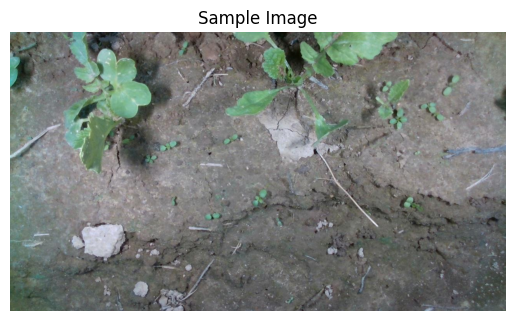

In [29]:
import matplotlib.pyplot as plt
from PIL import Image

# Display the first image
image = Image.open(valid_images[0])
plt.imshow(image)
plt.axis('off')  # Remove axes for better visualization
plt.title("Sample Image")
plt.show()


Perform Data Augmentation

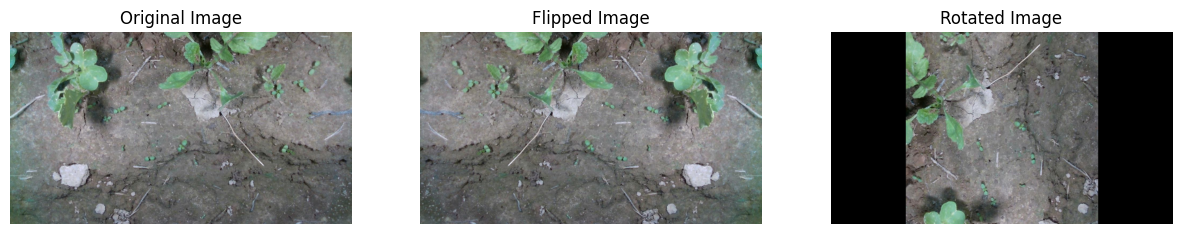

In [31]:
from PIL import ImageOps
# Augment a sample image
image=Image.open(valid_images[0]) # open the first image
flipped_image=ImageOps.mirror(image)
# Rotate the image by 90 degrees
rotated_image=image.rotate(90)
# show augmented images
fig,axes=plt.subplots(1,3,figsize=(15,5))
# show original images
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')
# show flipped image
axes[1].imshow(flipped_image)
axes[1].set_title("Flipped Image")
axes[1].axis('off')
# show rotated image
axes[2].imshow(rotated_image)
axes[2].set_title("Rotated Image")
axes[2].axis('off')
plt.show()


In [32]:
import os

output_dir = "augmented_images"
os.makedirs(output_dir, exist_ok=True)


In [33]:
from tqdm import tqdm  # Progress bar

# Loop through all images and augment them
for idx, img_path in enumerate(tqdm(valid_images, desc="Augmenting Images")):
    try:
        # Open the image
        image = Image.open(img_path)

        # Flip and Rotate
        flipped_image = ImageOps.mirror(image)
        rotated_image = image.rotate(90)

        # Save augmented images
        base_name = os.path.splitext(os.path.basename(img_path))[0]  # Extract base name
        flipped_image.save(os.path.join(output_dir, f"{base_name}_flipped.jpg"))
        rotated_image.save(os.path.join(output_dir, f"{base_name}_rotated.jpg"))
    except Exception as e:
        print(f"Error processing {img_path}: {e}")


Augmenting Images: 100%|██████████| 2822/2822 [01:05<00:00, 43.39it/s]


In [34]:
import glob

# List all augmented images
augmented_files = glob.glob("augmented_images/*")
print(f"Number of augmented images: {len(augmented_files)}")


Number of augmented images: 5644
